# A/B Test
This notebook tries to explain the math behind AB test and how to apply it to our suction cup selection data validation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Distribution

In mathematics, a distribution is a mathematical object that describes the behavior or characteristics of a set of data points or a random variable.

Distributions are widely used in various branches of mathematics, statistics, and applied fields to model and analyze real-world phenomena. They provide a way to represent and understand the patterns, probabilities, and properties of data or random variables.

Some commonly encountered distributions include:

* Uniform Distribution: The uniform distribution represents a continuous probability distribution where all outcomes within a given range are equally likely. It is often used to model situations where all values have the same likelihood of occurrence.

* Binomial Distribution: The binomial distribution represents the probability distribution of the number of successes in a fixed number of independent Bernoulli trials. It is often used to model binary outcomes or events with two possible outcomes.

* Normal Distribution (Gaussian Distribution): The normal distribution is a continuous probability distribution that is symmetric and bell-shaped. It is characterized by its mean and standard deviation and is widely used in statistical inference and modeling.


## Common Metrics for Distribution

Mean:
$\mu = \frac{\sum_{i=1}^{n}(x_i)}{n}$

Standard Deviation
$\sigma = \sqrt{\frac{1}{n} \sum_{i=1}^{n}(x_i - \mu)^2}$

## Uniform Distribution

The uniform distribution is a probability distribution in which all outcomes within a given range are equally likely. It is often represented as a rectangular-shaped distribution, where the probability density function (PDF) is constant over the range of possible values.

The mathematical notation for a continuous uniform distribution is denoted as U(a, b), where 'a' and 'b' are the parameters representing the lower and upper bounds of the distribution, respectively.

The PDF of the uniform distribution is defined as:

$ f(x) = \frac{1}{{b - a}}, \quad \text{for } a \leq x \leq b $


Where:

* f(x) represents the probability density function at a given value 'x'.
* 'a' represents the lower bound of the distribution.
* 'b' represents the upper bound of the distribution.

The cumulative distribution function (CDF) of the uniform distribution is a linear function that increases uniformly from 0 to 1 over the range (a, b). It is defined as:

$F(x) = 
\begin{cases}
    0, & \text{for } x < a \\
    \frac{{x - a}}{{b - a}}, & \text{for } a \leq x \leq b \\
    1, & \text{for } x > b \\
\end{cases}$
The mean (μ) and variance (σ^2) of the uniform distribution can be calculated using the following formulas:

$ \mu = \frac{a + b}{2} $

$ \sigma^2 = \frac{(b - a)^2}{12} $

The mean represents the center of the distribution, and the variance measures the spread or dispersion of the data points within the range.

The uniform distribution is often used in situations where all outcomes within a specific interval have equal probability. For example, when modeling the roll of a fair die or selecting a random number from a known range.

Note that there are discrete versions of the uniform distribution as well, where the outcomes are equally likely among a finite set of values. The mathematical concepts discussed here primarily apply to the continuous uniform distribution.


In [107]:
import numpy as np

# Generate a random number from a uniform distribution between 0 and 1
np.random.uniform(0, 1, size=10)

array([0.16759108, 0.79428153, 0.94011117, 0.00397354, 0.01489653,
       0.33870155, 0.8504876 , 0.55000313, 0.2923061 , 0.6059914 ])

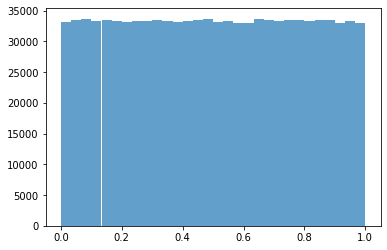

In [109]:
n = int(1e6)
sample = np.random.uniform(0, 1, size=n)

# Plot the histogram of the sample
plt.hist(sample, bins=30, alpha=0.7, label='Sample Histogram')

# Display the plot
plt.show()

## Bernoulli Distribution

The Bernoulli distribution is a discrete probability distribution that models a single binary outcome or event with two possible outcomes: success (usually denoted as 1) and failure (usually denoted as 0).

The probability mass function (PMF) of the Bernoulli distribution is given by:

$P(X = x) = p^{x} * (1 - p)^{1 - x}$

Where:
p is the probability of success.

The PMF states that the probability of the outcome being x is given by p if x = 1 (success) or 1 - p if x = 0 (failure).

The mean (μ) and variance (σ^2) of the Bernoulli distribution can be calculated as follows:

$\mu = p$

$\sigma^2 = p * (1 - p)$

The mean represents the average value or probability of success, and the variance measures the spread or dispersion of the data points around the mean.

The Bernoulli distribution is commonly used to model binary events or situations with two possible outcomes, such as flipping a coin (heads or tails), passing or failing an exam, or the success or failure of a single trial.

It's important to note that the Bernoulli distribution assumes that each trial is independent and has a constant probability of success (p) for each trial.

In [112]:
# Define the size
n = int(1e6)

# Define the probability of success (p)
p = 0.3

# Perform a Bernoulli trial
sample = np.random.choice([0, 1], p=[1-p, p], size = n)

sample[0:10]

array([1, 0, 0, 1, 1, 0, 0, 1, 1, 1])

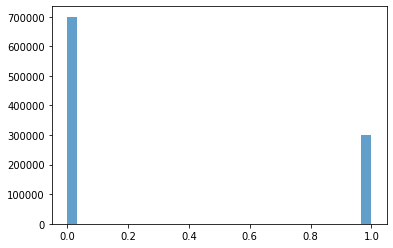

sample mean: 0.300051, calculated mean: 0.3
sample var: 0.21002039739899997, calculated var: 0.21


In [113]:
# Plot the histogram of the sample
plt.hist(sample, bins=30, alpha=0.7, label='Sample Histogram')

# Display the plot
plt.show()

# show mean
print(f"sample mean: {sample.mean()}, calculated mean: {p}")
print(f"sample var: {sample.var()}, calculated var: {p*(1-p)}")

## Binomial distribution

The binomial distribution is a discrete probability distribution that models the number of successes in a fixed number of independent **Bernoulli** trials. It is characterized by two parameters: the number of trials (n) and the probability of success in each trial (p).

The probability mass function (PMF) of the binomial distribution is given by:

$P(X = k) = \binom{n}{k} * p^{k} * (1 - p)^{n - k}$

Where:

* X is the random variable representing the number of successes.
* k is the number of successes (0, 1, 2, ..., n).
* $\binom{n}{k}$ is the binomial coefficient, also known as "n choose k" or the number of ways to choose k items from a set of n items. It can be calculated as: C(n, k) = n! / (k! * (n - k)!), where "!" denotes the factorial function.
* p is the probability of success in each trial.
* n is the total number of trials.

The mean (μ) and variance (σ^2) of the binomial distribution can be calculated as follows:

$  \mu = n * p $

$ \sigma^2 = n * p * (1 - p) $

The mean represents the average number of successes in the given number of trials, and the variance measures the spread or dispersion of the data points around the mean.

The binomial distribution is commonly used to model situations with two possible outcomes (success or failure) in a fixed number of independent trials. Examples include flipping a coin, rolling a die, or counting the number of defective items in a batch of production.

It's important to note that the binomial distribution assumes each trial is independent and has the same probability of success (p).

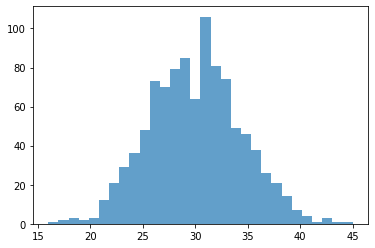

sample mean: 30.006, calculated mean: 30.0
sample var: 20.345964, calculated var: 21.0


In [114]:
n_trial = int(1000)
n = 100
p = 0.3

sample = np.zeros(n_trial)

for i in range(n_trial):
    trials = np.random.choice([0, 1], p=[1-p, p], size = n)
    sample[i] = trials.sum()

# Plot the histogram of the sample
plt.hist(sample, bins=30, alpha=0.7, label='Sample Histogram')

# Display the plot
plt.show()

# show mean
print(f"sample mean: {sample.mean()}, calculated mean: {n*p}")
print(f"sample var: {sample.var()}, calculated var: {n*p*(1-p)}")

## Normal Distribution



The normal distribution, also known as the Gaussian distribution or bell curve, is a continuous probability distribution that is symmetric and characterized by its mean ($\mu$) and standard deviation ($\sigma$). The probability density function (PDF) of the normal distribution is given by:

$f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right)$

where:

* $x$ represents the random variable
* $\mu$ represents the mean of the distribution
* $\sigma$ represents the standard deviation of the distribution

The PDF describes the relative likelihood of obtaining a specific value $x$ from the distribution.

where $f(t)$ is the PDF of the normal distribution. Unfortunately, the CDF does not have a closed-form expression, so it is typically calculated using numerical methods or precomputed tables.

The mean ($\mu$) of the normal distribution determines the location of the peak of the bell curve, while the standard deviation ($\sigma$) controls the spread or width of the curve. The larger the standard deviation, the wider the distribution.

The normal distribution is widely used in statistics and various fields due to its many desirable properties, such as its symmetry, the **central limit theorem**, and its applicability to many natural phenomena.

If X follows normal distribution, usually we use to 

$X  \sim N(\mu, \sigma^{2})$


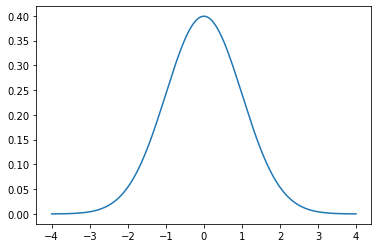

In [115]:
# draw the norm dist pdf
from scipy.stats import norm
x= np.arange(-4,4,0.001)
plt.plot(x, norm.pdf(x))
plt.show()

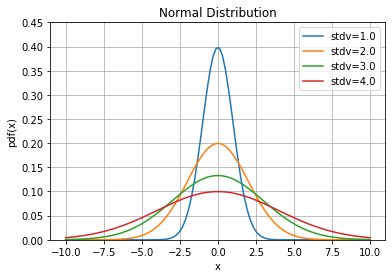

In [116]:
# draw pdf with different coef
fig, ax = plt.subplots()
x = np.linspace(-10,10,100)
stdvs = [1.0, 2.0, 3.0, 4.0]
for s in stdvs:
    ax.plot(x, norm.pdf(x,scale=s), label='stdv=%.1f' % s)
    
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.set_title('Normal Distribution')
ax.legend(loc='best', frameon=True)
ax.set_ylim(0,0.45)
ax.grid(True)

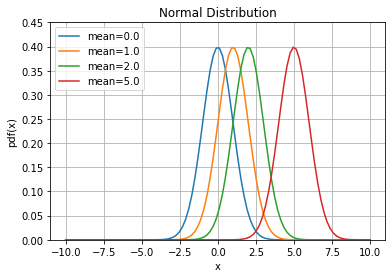

In [117]:
# draw pdf with different mean
fig, ax = plt.subplots()
x = np.linspace(-10,10,100)
means = [0.0, 1.0, 2.0, 5.0]
for mean in means:
    ax.plot(x, norm.pdf(x,loc=mean), label='mean=%.1f' % mean)
    
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.set_title('Normal Distribution')
ax.legend(loc='best', frameon=True)
ax.set_ylim(0,0.45)
ax.grid(True)

In [118]:
# sample from the norm dist
sample= np.random.normal(0, 1, 10)
print(sample)

[ 1.39189645 -0.82532811  0.94139577 -0.38219622 -0.50838713  0.86062174
 -0.74853162  1.56168325 -0.33247171 -0.14163258]


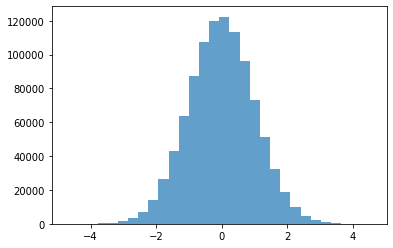

sample mean: -0.0008792162394881638, calculated mean: 0
sample var: 1.0025709944383558, calculated var: 1


In [120]:
n = int(1e6)
m = 0
std = 1

sample = np.random.normal(m, std, n)

# Plot the histogram of the sample
plt.hist(sample, bins=30, alpha=0.7, label='Sample Histogram')

# Display the plot
plt.show()

# show mean
print(f"sample mean: {sample.mean()}, calculated mean: {m}")
print(f"sample var: {sample.var()}, calculated var: {std**2}")

In [121]:
# CDF of norm
from scipy.stats import norm
m = 0
std = 1
x = 0

In [122]:
norm.cdf(x=x, loc=m, scale=std)

0.5

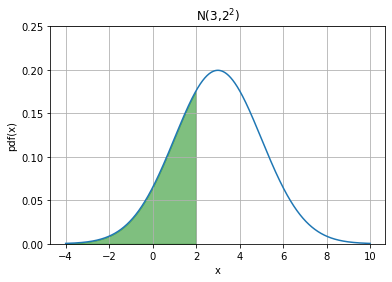

In [123]:
# Plot
fig, ax = plt.subplots()
# for distribution curve
x= np.arange(-4,10,0.001)
ax.plot(x, norm.pdf(x,loc=3,scale=2))
ax.set_title("N(3,$2^2$)")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)
# for fill_between
px=np.arange(-4,2,0.01)
ax.set_ylim(0,0.25)
ax.fill_between(px,norm.pdf(px,loc=3,scale=2),alpha=0.5, color='g')
plt.show()

### Normal Distribution Quantile

In [125]:
# To find the x value when P(X<x) = 0.95
norm.ppf(q=0.95, loc=0, scale=1)

1.6448536269514722

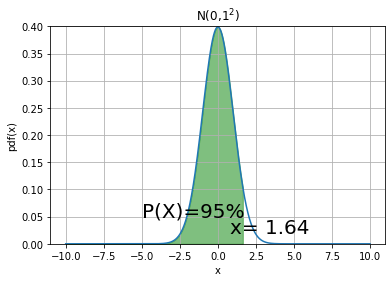

In [126]:
#plot
fig, ax = plt.subplots()
x= np.arange(-10,10,0.001)
ax.plot(x, norm.pdf(x,loc=0,scale=1))
ax.set_title("N(0,$1^2$)")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)
xpoint=norm.ppf(q=0.95, loc=0, scale=1)
px=np.arange(-10,xpoint,0.01)
ax.set_ylim(0,0.4)
ax.fill_between(px,norm.pdf(px,loc=0,scale=1),alpha=0.5, color='g')
ax.text(.8,0.02,"x= %.2f" %xpoint, fontsize=20)
ax.text(-5,0.05,"P(X)=95%", fontsize=20)
plt.show()

## Central Limit Theorem

The Central Limit Theorem (CLT) states that under certain conditions, the sum (or average) of a large number of independent and identically distributed random variables will approximately follow a normal distribution, regardless of the shape of the original distribution.

The key idea behind the Central Limit Theorem is that even if individual random variables may not follow a normal distribution, their sum tends to become more normally distributed as the number of variables increases.

The conditions required for the Central Limit Theorem to hold are:

Independence: The random variables should be independent of each other. This means that the outcome of one variable does not influence the outcome of any other variable.

Identical distribution: The random variables should be drawn from the same probability distribution. They should have the same mean and variance.

Finite variance: The random variables should have a finite variance. This condition ensures that the fluctuations in the variables do not become too extreme.

The Central Limit Theorem has significant implications in statistics because it allows us to make inferences about population parameters based on sample data. It justifies the use of the normal distribution and related statistical tests in many practical scenarios, even if the underlying data may not be normally distributed.

For example, if we take repeated samples of a population and calculate the mean of each sample, the distribution of those sample means will tend to follow a normal distribution. This enables us to make statements about the population mean and estimate confidence intervals.

In summary, the Central Limit Theorem is a fundamental concept that states that the sum or average of a large number of independent and identically distributed random variables will tend to have a normal distribution, regardless of the original distribution, provided certain conditions are met.

## Central Limit Theorem with Bernoulli Distribution

Image you have a X follows Bernoulli distribution with P = p. According to CLT, the mean of X($\hat{p}$) follows normal distribution. Let's try to model this normal distribution.

The mean of the normal distribution is:
$E(\frac{\sum_{i=1}^{n}{X_i}}{n}) = \frac{nE(X)}{n} = E(X) = p$

The var of the normal distribution is:
$Var(\frac{\sum_{i=1}^{n}{X_i}}{n}) = \frac{nVar(X)}{n^2} = \frac{p(1-p)}{n}$

Hence $\hat{p}  \sim N(p, \frac{p(1-p)}{n})$


## AB Test on Bernoulli trials

Imaging you have a website and you want to test if the new feature can increase the conversion rate of visitors. You split the users into group A and B. For the users in group A, the website will be loaded without the feature. On contrary, the feature is shown for users in group B. In other words, group A is our **control** group, group B is our **exp** group.

You can consider each user visiting the website as a Bernoulli event, with two possible outcomes, clicke another link(1), or left(0). 

With n # of trials per group, and under the assumption of CLT, we can get the mean of the outcomes from group A follows a normal distribution

$\hat{p_A}  \sim N(p_A, \frac{p_A(1-p_A)}{n})$

Same for group B.

The next question is the mean of group A different from the mean of group B? If so, how big is the difference? This is the core of AB test. We can model the difference of the mean using(We can do this because each event is independent):


$\hat{p_B} - \hat{p_A} = \hat{d} \sim N(d, Var(X_A)+Var(X_B))$

$Var(X_A)+Var(X_B)$ can be calculated using pooled standard error $SE_{pool}^2$ as $p(1-p)(\frac{1}{n_A} + \frac{1}{n_B})$ 
Where $p = \frac{p_A*n_A+p_B*n_B}{n_A+n_B}$

**From here you can see that with larger N, the pooled standard error reduces. This is intuitive because with more examples, the sample mean is naturally closer to true mean hence less deviation.**



#### The question of whether group A and B have the same mean equals to whether the d is 0 or not 

Using the concept of hypothesis testing, here we form the hypothesis:

**Null Hypothesis**
$h_0: d = 0 $

**Alternative Hypothesis**
$h_1: d > 0 $

This hypothesis testing is the AB test.

## Parameters on AB Test

Now we know that the hypothesis testing is the core of AB test. To get the data to support the testing,  there are some concepts and parameters needed first.


### Event Definition

In our website conversion rate scenario, the event can be defined in multiple ways. You can say an event is an IP address visiting the website. Though the same IP can be shared with multiple users, hence it is not the best metric to track user consistency. Another way is define the event as a customer ID visiting the site. Those different ways of identification is called **unit of diversion**. The event outcome is binary, 0 means user left, 1 means user clicked another link.
 

In the suction cup scenario, the event will just be a unit pick task assigned to the arm. The event outcome is also binary, 0 means the pick failed due to certain reasons, 1 means the pick succeeded.


### Benchmark
Benchmark is the baseline of the AB test. It is the mean of the control group. Since in reality you never know the true mean of the control group, we will just use the sample mean as the unbiased estimation. In our website conversion rate case, the benchmark is the $p_A$. In our suction cup case, the benchmark is the success rate of the tasks with suction cup used in control group.

### Minimum Effect of Interest(MEI)

It describes that how much difference is considered significant or meaningful in the analysis. Usually it is written as $d_{min}$. It could be absolute or relative. It defines the mean of the normal distribution of the exp group. We assumes that the exp group follows $N(p_A\pm d_{min}, \sigma^2)$. It is closely related to the size of the test. Say the benchmark p = 0.9, alpha is 0.05, and the MEI is set to 0.01. If the null hypothesis is rejected, then we can say that on 95% significance level, the conversion rate of exp group is at least 1% higher/lower than control group.


### Significance(Alpha)

In an A/B test, the term "alpha" refers to the significance level or the threshold for statistical significance. It is a predetermined level of probability that is used to determine whether the results of the test are statistically significant or not.

Typically, the alpha level is set at 0.05, which means that there is a 5% chance of observing a significant difference between the two variations (A and B) of the test purely by chance. 

1 minus alpha is usually called as confidence level.


### One-sided test or two-sided test?

Sometimes they are called one-tail/two-tail test. The choice between a one-sided and two-sided test depends on the research question, the hypothesis being tested, and the prior expectations. One-sided tests are used when there is a specific directional hypothesis or a strong theoretical justification for focusing on a specific direction. Two-sided tests are generally more conservative, as they consider the possibility of a difference in either direction.

In the website case, one side test makes more sense because we want to know if the new feature increases the converation rate. This is only one directional change. In suction cup case, we might do two-sided as we don't know which cup is better.


### Power

In an A/B test, the power refers to the probability of correctly rejecting the null hypothesis when it is false. It is a measure of the test's ability to detect a true effect or difference between the variations being compared (A and B) in the experiment.

In statistical terms, power is influenced by several factors, including the sample size, MEI, significance level (alpha), and the variability of the data. A higher power indicates a higher chance of detecting a true effect if it exists.

We usually use 80% as the power in the AB test.

Good to know Beta: $\beta = 1 - Power$


Question:
How would the below factor affect power:
* Alpha
* MEI
* Standard Deviation of the Sample
* Sample Size



### Confusion Matrix

This is the common matrix for evaluating the performance of a model or test.


|                 | Predicted Negative | Predicted Positive |
| --------------- | ------------------ | ------------------ |
| Actual Negative | TN | FP |
| Actual Positive | FN | TP |


To link them with the parameters of the AB test:

* TN -> 1 - alpha
* TP -> Power
* FN -> Beta
* FP -> alpha

### Sample Size

The most important factor of AB test. The size of your sample determines the standarded error of $\hat{d}$, which has direct impact to the statistics power.

The sample size can be calculated with alpha, power, dmin and benchmark.


$ n = \frac{2\sigma^2(-Z_{\beta}+Z_{\frac{\alpha}{2}})^2}{d_{min}^2} $

$\sigma = \sqrt{p(1-p)}$ when the size is the same for control and exp group. The p here could be the p of the control group or the pooled mean. 



## Z test on $ d $ with corresponding size and alpha

Once the size n has been calculated, we could perform the Z test as long as n > 30. 

Here are the steps:

1. Calculate $d = p_B - p_A$, which is the mean of group B minus mean of group A. 
2. With the null hypothesis $\hat{d} \sim N(0, {SE}^{2})$, we can easily get confidence interval $ [-SE*Z_{\frac{\alpha}{2}}, SE*Z_{\frac{\alpha}{2}}] $, where SE = sqrt(p_pool*(1/n_ctl + 1/n_exp))
3. Calculate the p value d represents.
4. If d falls out of the range then we reject null hypothesis, meaning p < alpha/2, then reject the null hypothesis.



## Example: Website Feature AB Test

In [5]:
from ABTestToolKit import get_two_sample_size_twosided, get_two_sample_Z_test_twosided

# Parameters
baseline = 0.85
dmin = baseline*0.05
alpha = 0.05
power = 0.8

# Find Size
n = get_two_sample_size_twosided(alpha, power, dmin, baseline)
print(f"size:{n}")

size:1089


In [12]:
# Fake the data
sample_ctl = np.random.choice([0, 1], p=[1-baseline, baseline], size = n)
sample_exp = np.random.choice([0, 1], p=[1-(baseline+dmin), (baseline+dmin)], size = n)

# run Z test
get_two_sample_Z_test_twosided(n_ctl=n, x_ctl=sample_ctl.sum(), n_exp= n, x_exp=sample_exp.sum(), alpha=alpha)

control mean: 0.6031990647252631
experiment mean: 0.6054841109575938
The confidence interval for the difference is [-0.0134, -0.0023, 0.0088]
statistics: 0.4032185307706259
The p value: 0.6867874686119646


(0.4032185307706259,
 0.6867874686119646,
 -0.01339219527584741,
 0.008822102811185964,
 -0.002285046232330723)

## Takeaway: Experiment Document

For every AB test, the first step is to create the experiment design document. I think this is what you need to put into the paper. Below I listed the necessary contents for a AB test experiment design. You need to fill the content in with the setup of the suction cup testing.

1. Business Hypothesis: Why do we perform the AB test. The reason is we assume each suction cup performs differently on the same SKU. This is the business hypothesis.
    1. Null hypothesis:
    2. Goal of the experiment: 
    
2. Unit of Measure/Randomization/Event definition: For us each arm task is a event.

3. Outcome metric: What's the possible outcome of the event and how you categorize it.

4. Size calculation: Here you should explain how the sample size is calculated with code examples. You can use the SKU picking data to get the p.

5. Experiment setup: How do you plan to perform the test. I think there are two ways. One is to track the production tasking history until we got the enough sample. The other way is that we can ask the arm to pick the given SKU during off hours. This needs to be implemented in the future.

6. Run experiment. How the data is cleaned and processed. How does the data look like.

7. Result analysis. Tools and theories used. With code and example.


